# Day 6
batch size 256 lr 1e-3, normed weighted, rotated, cartesian, DO15

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using Theano backend.


## Options

In [2]:
classTrainFeatures = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']
inputPipe, outputPipe = getPreProcPipes(normIn=True)
classModel = 'modelSwish'
varSet = "basic_rot_features"

nSplits = 10
ensembleSize = 10
ensembleMode = 'loss'

maxEpochs = 200
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam', 'do':15}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs}

print "\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures]


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [3]:
trainData = h5py.File(dirLoc + 'train.hdf5', "r+")
valData = h5py.File(dirLoc + 'val.hdf5', "r+")

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 6.874s 


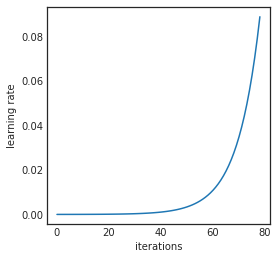

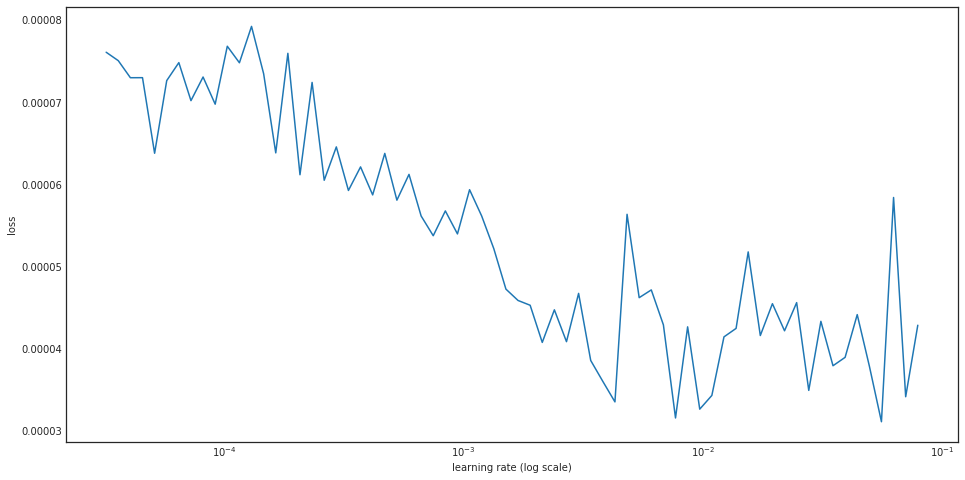

______________________________________



In [4]:
lrFinder = batchLRFindClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

In [5]:
compileArgs['lr'] = 1e-3

## Train classifier

Using cosine annealing
Training using weights
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 4.26274455957e-05
2 New best found: 3.83506693803e-05
3 New best found: 3.77040717391e-05
4 New best found: 3.63674693748e-05
5 New best found: 3.59345517756e-05
6 New best found: 3.50927771064e-05
7 New best found: 3.49226799273e-05
10 New best found: 3.42235169141e-05
11 New best found: 3.4099344743e-05
12 New best found: 3.39511391161e-05
13 New best found: 3.38541895528e-05
20 New best found: 3.37951537794e-05
21 New best found: 3.36122889946e-05
24 New best found: 3.32699017835e-05
27 New best found: 3.3260490522e-05
28 New best found: 3.32138456121e-05
29 New best found: 3.31854492532e-05
30 New best found: 3.31664932155e-05
31 New best found: 3.31651068021e-05
42 New best found: 3.30747351986e-05
47 New best found: 3.30718865296e-05
51 New best found: 3.30309200644e-05
52 New best found: 3.28759566367e-05
53 New best found: 3.28752614778e-05
54 New best fo

61 New best found: 3.2206931391e-05
62 New best found: 3.22056528611e-05
103 New best found: 3.21954013659e-05
106 New best found: 3.21153325971e-05
115 New best found: 3.21146411757e-05
Early stopping after 175 epochs
Score is: {'loss': 3.2114641175688651e-05, 'AUC': 0.10220778922497986, 'wAUC': 0.064069280859012201}
Fold took 153.109s

Running fold 7 / 10
1 New best found: 4.29721086905e-05
2 New best found: 3.7820243714e-05
3 New best found: 3.71577464316e-05
5 New best found: 3.58744282101e-05
6 New best found: 3.53905555044e-05
7 New best found: 3.53492369064e-05
8 New best found: 3.5232859515e-05
10 New best found: 3.50257277313e-05
11 New best found: 3.48412576968e-05
12 New best found: 3.46384781553e-05
13 New best found: 3.44036543453e-05
14 New best found: 3.43247483893e-05
15 New best found: 3.42945199119e-05
20 New best found: 3.42931315777e-05
21 New best found: 3.42051932058e-05
22 New best found: 3.40095535481e-05
26 New best found: 3.38302611292e-05
29 New best found: 3

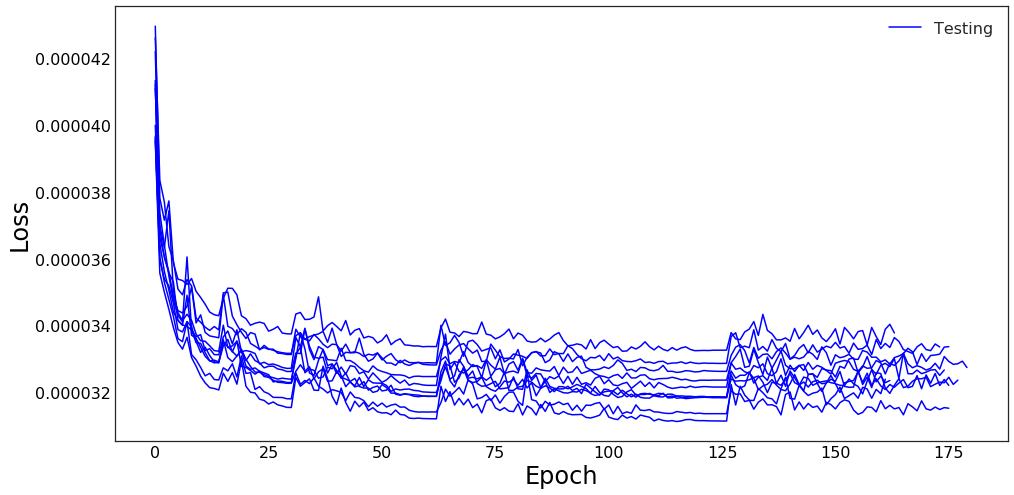

Mean wAUC = 0.0645 +- 0.0007
______________________________________



In [6]:
results, histories = batchTrainClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, patience=60, cosAnnealMult=2, trainOnWeights=True, maxEpochs=maxEpochs, verbose=1)

## Construct ensemble

In [7]:
with open('train_weights/resultsFile.pkl', 'r') as fin:   
    results = pickle.load(fin)

In [8]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 2 with loss = 3.11228861248e-05
Model 1 is 9 with loss = 3.13535440555e-05
Model 2 is 8 with loss = 3.18093605624e-05
Model 3 is 1 with loss = 3.18218019943e-05
Model 4 is 3 with loss = 3.18428820054e-05
Model 5 is 5 with loss = 3.21146411757e-05
Model 6 is 4 with loss = 3.23368290251e-05
Model 7 is 0 with loss = 3.25945279079e-05
Model 8 is 7 with loss = 3.28526277209e-05
Model 9 is 6 with loss = 3.32295626131e-05


## Response on development data

In [9]:
batchEnsemblePredict(ensemble, weights, trainData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000238810769976s per sample

Predicting batch 2 out of 10
Prediction took 0.000187686071248s per sample

Predicting batch 3 out of 10
Prediction took 0.000179539119701s per sample

Predicting batch 4 out of 10
Prediction took 0.000185381293297s per sample

Predicting batch 5 out of 10
Prediction took 0.000172857058048s per sample

Predicting batch 6 out of 10
Prediction took 0.000168206048012s per sample

Predicting batch 7 out of 10
Prediction took 0.000228045403957s per sample

Predicting batch 8 out of 10
Prediction took 0.000187167656875s per sample

Predicting batch 9 out of 10
Prediction took 0.000168437069372s per sample

Predicting batch 10 out of 10
Prediction took 0.000171573276883s per sample



In [10]:
print 'Training ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData)),
                                                            roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData), sample_weight=getFeature('weights', trainData)))

Training ROC AUC: unweighted 0.905784919753, weighted 0.941168737218


## Response on val data

In [11]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000233741378784s per sample

Predicting batch 2 out of 10
Prediction took 0.000166956233978s per sample

Predicting batch 3 out of 10
Prediction took 0.000159560203552s per sample

Predicting batch 4 out of 10
Prediction took 0.000159989786148s per sample

Predicting batch 5 out of 10
Prediction took 0.000168535804749s per sample

Predicting batch 6 out of 10
Prediction took 0.000183084774017s per sample

Predicting batch 7 out of 10
Prediction took 0.000193869829178s per sample

Predicting batch 8 out of 10
Prediction took 0.000164506387711s per sample

Predicting batch 9 out of 10
Prediction took 0.000185350179672s per sample

Predicting batch 10 out of 10
Prediction took 0.000173336410522s per sample



In [12]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData), getFeature('pred', valData)),
                                                           roc_auc_score(getFeature('targets', valData), getFeature('pred', valData), sample_weight=getFeature('weights', valData)))

Testing ROC AUC: unweighted 0.902010105431, weighted 0.934810158932


## Evaluation

### Import in dataframe

In [13]:
valframe = convertToDF(valData)

50000 candidates loaded


In [14]:
sigVal = (valframe.gen_target == 1)
bkgVal = (valframe.gen_target == 0)

### MVA distributions

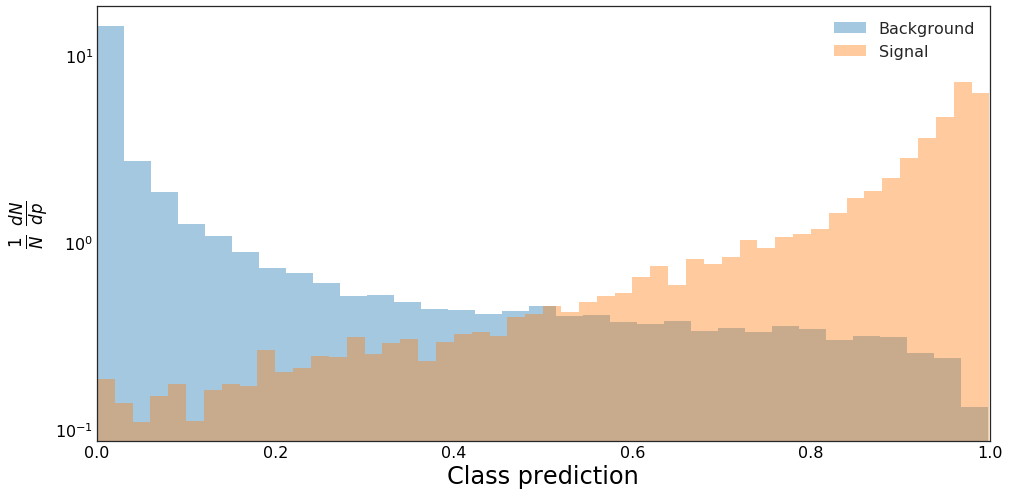

In [15]:
getClassPredPlot([valframe[bkgVal], valframe[sigVal]], weightName='gen_weight')

In [16]:
valframe['ams'] = amsScan(valframe)[0]

[0.96335846185684204, 1.7166068969057429]


In [17]:
bests = foldAMSScan(valframe, 10)

[0.98847979307174683, 1.8446569849013283]
Fold 0, best AMS 1.8446569849 at cut of 0.988479793072. Total weights Signal:Bkg. 13.7932443619:8120.48339844


../Modules/Basics.py:61: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  np.sum(inData.iloc[test][inData.gen_target == 1]['gen_weight']),
../Modules/Basics.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  np.sum(inData.iloc[test][inData.gen_target == 0]['gen_weight']))


[0.98422497510910034, 2.2224696350001416]
Fold 1, best AMS 2.222469635 at cut of 0.984224975109. Total weights Signal:Bkg. 14.0102291107:8319.28710938
[0.98132389783859253, 1.943148130518924]
Fold 2, best AMS 1.94314813052 at cut of 0.981323897839. Total weights Signal:Bkg. 14.0652093887:8096.15429688
[0.97800183296203613, 1.5954438271877591]
Fold 3, best AMS 1.59544382719 at cut of 0.978001832962. Total weights Signal:Bkg. 13.5248584747:8199.93261719
[0.97199159860610962, 2.336499286046422]
Fold 4, best AMS 2.33649928605 at cut of 0.971991598606. Total weights Signal:Bkg. 14.1886138916:8292.62988281
[0.94692283868789673, 1.7686001523960044]
Fold 5, best AMS 1.7686001524 at cut of 0.946922838688. Total weights Signal:Bkg. 13.9818534851:8224.16894531
[0.92725753784179688, 1.9519846260473714]
Fold 6, best AMS 1.95198462605 at cut of 0.927257537842. Total weights Signal:Bkg. 13.6698827744:8081.98632812
[0.98883432149887085, 1.9203949416728334]
Fold 7, best AMS 1.92039494167 at cut of 0.98

In [18]:
scoreTest(ensemble, weights)

Predicting batch 1 out of 10
Prediction took 0.000183389763399s per sample

Predicting batch 2 out of 10
Prediction took 0.000198158706318s per sample

Predicting batch 3 out of 10
Prediction took 0.000176312216845s per sample

Predicting batch 4 out of 10
Prediction took 0.000178733036735s per sample

Predicting batch 5 out of 10
Prediction took 0.00017733409188s per sample

Predicting batch 6 out of 10
Prediction took 0.000173607145656s per sample

Predicting batch 7 out of 10
Prediction took 0.000181259567087s per sample

Predicting batch 8 out of 10
Prediction took 0.000174815871499s per sample

Predicting batch 9 out of 10
Prediction took 0.000170275800878s per sample

Predicting batch 10 out of 10
Prediction took 0.000169090656801s per sample



In [21]:
saveTest(0.96335846185684204, 'Day_6')

../Data/Day_6_test.csv


In [24]:
!kaggle competitions submit -c higgs-boson -f ../Data/Day_6_test.csv -m"Day_6_pre_DO15 overall"

Successfully submitted to Higgs Boson Machine Learning Challenge